# An Earth Mover's Distance Based Graph Distance Metric For Financial Statements

In this notebook we show how the distance between two companies represented as vertex-weighted trees can be calculated. 

*Paper*: https://arxiv.org/abs/2112.07598

If you find the code useful, please consider citing this paper.
```bibtex
@misc{noels2021earth,
      title={An Earth Mover's Distance Based Graph Distance Metric For Financial Statements}, 
      author={Sander Noels and Benjamin Vandermarliere and Ken Bastiaensen and Tijl De Bie},
      year={2021},
      eprint={2112.07598},
      archivePrefix={arXiv},
      primaryClass={cs.CE}
}
```

First import the necessary dependencies:

In [20]:
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pickle

import sys
sys.path.append('../')

## Load the dataset

In [21]:
with open('../synthetic_data/synthetic_company_graph_data.pkl','rb') as handle:
    synthetic_company_graph_data = pickle.load(handle)

*This data is synthetical data inspired on the vertex-weighted balance sheets representation of a balance sheet and by no means represents real company data.* 

## Visualize the vetrex-weighted tree representation of a company

In [22]:
from src.visualization.visualize import visualize_company

The node labels represent the name of a node followed by its node weight (`node : weight`). 

Vertex-weighted tree representation of `synthetic_company_graph_data[0]`:

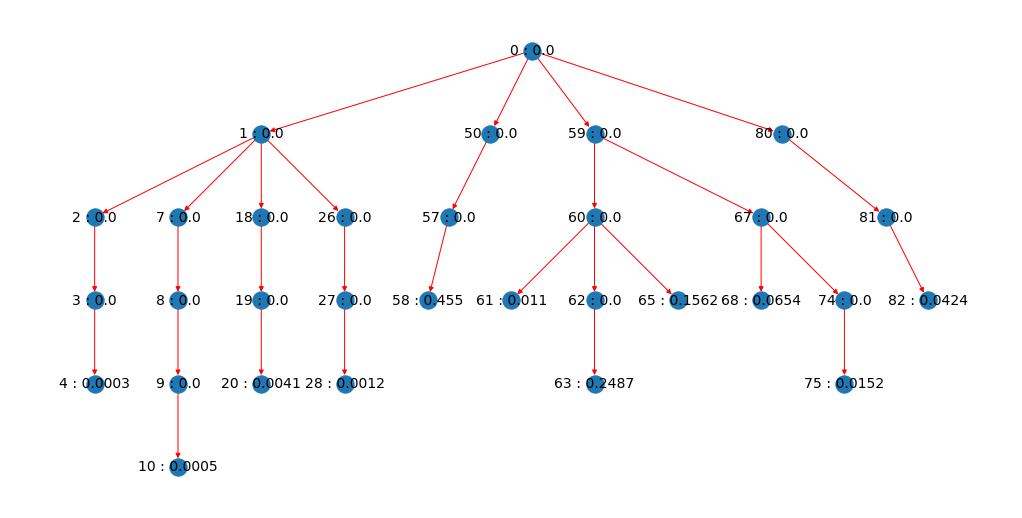

In [23]:
visualize_company(synthetic_company_graph_data[0], digits = 4)

Vertex-weighted tree representation of `synthetic_company_graph_data[1]`:

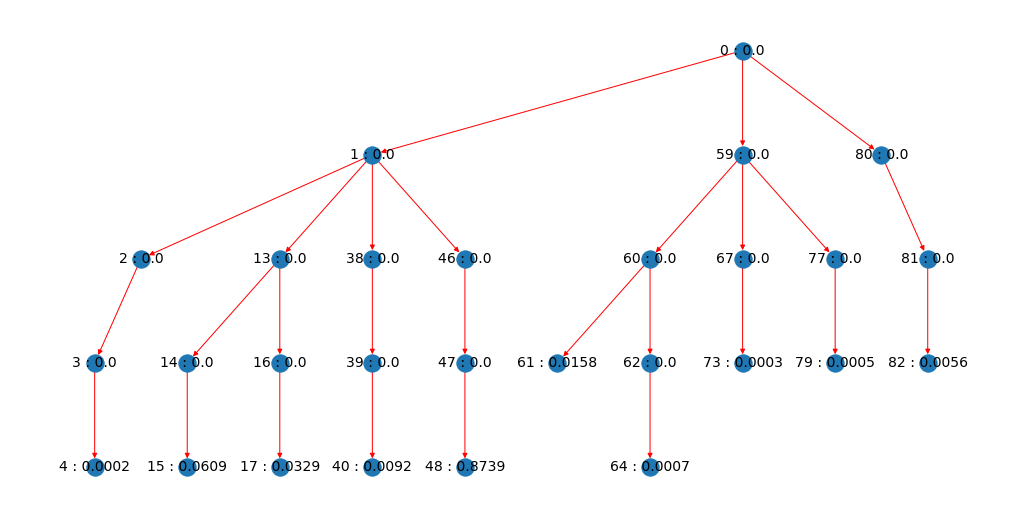

In [24]:
visualize_company(synthetic_company_graph_data[1], digits = 4)

## Compute the distance between two vetrex-weighted trees

In [25]:
import src.distance.graph_distance as gd

The earth mover's distance based graph distance metric between `synthetic_company_graph_data[0]` and `synthetic_company_graph_data[1]` is:

In [26]:
distance = gd.compute_graph_distance(synthetic_company_graph_data[0] ,synthetic_company_graph_data[1])

print('The distance between the graphs is', distance.total_abs_F)

The distance between the graphs is 7.109814786859999


## Visualize the edge flows

In [27]:
from src.visualization.visualize import plot_edge_flows

The weights that have to be shifted over the edges of `synthetic_company_graph_data[0]` in order to become identical to `synthetic_company_graph_data[1]` can be seen on the following graph:

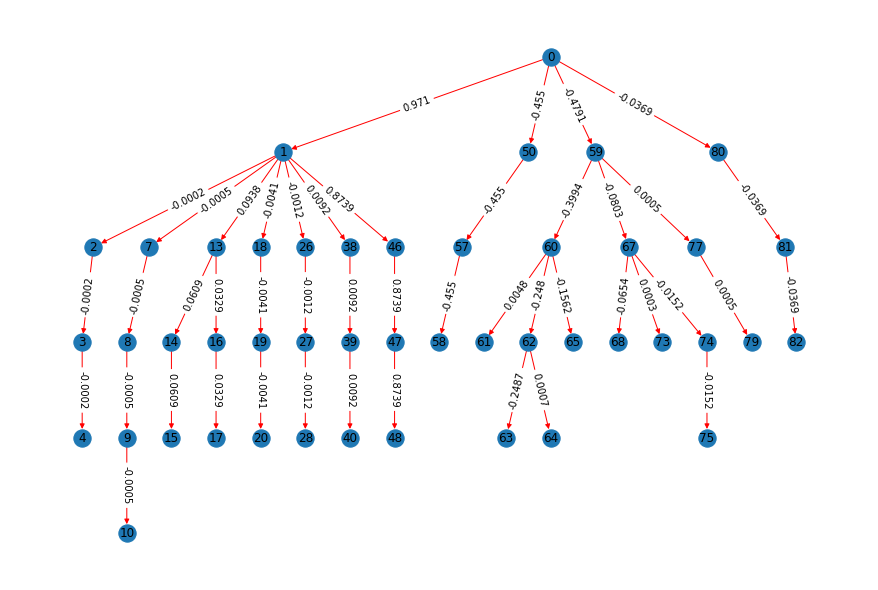

In [28]:
plot_edge_flows(synthetic_company_graph_data[0] ,synthetic_company_graph_data[1], distance.edges, distance.values, digits = 4)

Edges with a negative weight flow upwards, while those with a positive weight flow downwards.